<a href="https://colab.research.google.com/github/viky24/NLPROUTING/blob/master/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assumption:

#We are assuming that a user is fully converted when the user complete the entire funnel flow starting the navigator and all the way through the step of scheduling a medical exam

#Here we will focus on how to increase the pull through sign and exam

#Installling the prerquities and reading the data

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df1 = pd.read_csv('users (2).csv')
df2 = pd.read_csv('funnel_path_(2).csv')

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Overview of the data

In [90]:
df1.head()

,user_id,age,device,income,num_conditions,premium,marketing_channels
0,1001,56,desktop,157490,5,2490.123774,instagram
1,1002,34,desktop,138171,3,1906.228442,paid_search_nb
2,1003,32,desktop,94274,2,1515.217172,paid_search_nb
3,1004,32,desktop,160480,4,2263.763328,tv
4,1005,33,desktop,141943,3,1624.410806,podcast


In [91]:
df2.head()

,user_id,funnel_steps
0,1001,collect_contact_info
1,1001,started_navigator
2,1002,application_submit
3,1002,collect_contact_info
4,1002,phone_connect


#Merging the User ID and the funnel data to bring the information at each user level and the funnel steps the user went through

In [92]:
df3=df2.merge(df1, how='left')

In [93]:
df3.head()
#df3.shape


,user_id,funnel_steps,age,device,income,num_conditions,premium,marketing_channels
0,1001,collect_contact_info,56,desktop,157490,5,2490.123774,instagram
1,1001,started_navigator,56,desktop,157490,5,2490.123774,instagram
2,1002,application_submit,34,desktop,138171,3,1906.228442,paid_search_nb
3,1002,collect_contact_info,34,desktop,138171,3,1906.228442,paid_search_nb
4,1002,phone_connect,34,desktop,138171,3,1906.228442,paid_search_nb


In [94]:
df4=df3['user_id'].value_counts()

In [95]:
#type(df4)
df4=df4.to_frame().reset_index()
df4.head()

,index,user_id
0,5832,6
1,9945,6
2,9922,6
3,10564,6
4,10563,6


In [96]:
df3[(df3['user_id'] == 1002)]

,user_id,funnel_steps,age,device,income,num_conditions,premium,marketing_channels
2,1002,application_submit,34,desktop,138171,3,1906.228442,paid_search_nb
3,1002,collect_contact_info,34,desktop,138171,3,1906.228442,paid_search_nb
4,1002,phone_connect,34,desktop,138171,3,1906.228442,paid_search_nb
5,1002,sign_and_exam,34,desktop,138171,3,1906.228442,paid_search_nb
6,1002,started_navigator,34,desktop,138171,3,1906.228442,paid_search_nb
7,1002,viewed_quotes,34,desktop,138171,3,1906.228442,paid_search_nb


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#Here we are trying to have a glimpse on the drop out rate at each funnel step

#conversion rate change through the funnel overall 

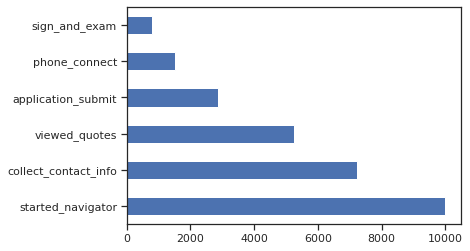

In [98]:
df3['funnel_steps'].value_counts().plot(kind='barh')

In [99]:
df3['funnel_steps'].value_counts()

started_navigator       10000
collect_contact_info     7220
viewed_quotes            5245
application_submit       2855
phone_connect            1525
sign_and_exam             784
Name: funnel_steps, dtype: int64

In [100]:
(784/10000)*100

7.84

In [101]:
((727-1021)/1021)*100

-28.795298726738494

Here we can see out of 10000 users in this data we have only 784 users got converted which comes around 8% of the users


In [102]:
dropout=pd.DataFrame(df3.groupby(by='marketing_channels')['funnel_steps'].value_counts())

In [103]:
dropout['change']=dropout.groupby(by='marketing_channels').pct_change(fill_method ='ffill')
dropout['Percentage change']=round(dropout['change']*100,2)
dropout

funnel_steps    change  \
marketing_channels funnel_steps                                   
facebook           started_navigator             1021       NaN   
                   collect_contact_info           727 -0.287953   
                   viewed_quotes                  534 -0.265475   
                   application_submit             288 -0.460674   
                   phone_connect                  179 -0.378472   
                   sign_and_exam                   97 -0.458101   
instagram          started_navigator             1520       NaN   
                   collect_contact_info          1093 -0.280921   
                   viewed_quotes                  782 -0.284538   
                   application_submit             419 -0.464194   
                   phone_connect                  218 -0.479714   
                   sign_and_exam                  106 -0.513761   
paid_search_nb     started_navigator             3002       NaN   
                   collect_contact_info          2191 -0.270153   
                   viewed_quotes                 1583 -0.277499   
                   application_submit             847 -0.464940   
                   phone_connect                  568 -0.329398   
                   sign_and_exam                  303 -0.466549   
podcast            started_navigator             3967       NaN   
                   collect_contact_info          2848 -0.282077   
                   viewed_quotes                 2073 -0.272121   
                   application_submit            1143 -0.448625   
                   phone_connect                  444 -0.611549   
                   sign_and_exam                  222 -0.500000   
tv                 started_navigator              490       NaN   
                   collect_contact_info           361 -0.263265   
                   viewed_quotes                  273 -0.243767   
                   application_submit             158 -0.421245   
                   phone_connect                  116 -0.265823   
                   sign_and_exam                   56 -0.517241   

                                         Percentage change  
marketing_channels funnel_steps                             
facebook           started_navigator                   NaN  
                   collect_contact_info             -28.80  
                   viewed_quotes                    -26.55  
                   application_submit               -46.07  
                   phone_connect                    -37.85  
                   sign_and_exam                    -45.81  
instagram          started_navigator                   NaN  
                   collect_contact_info             -28.09  
                   viewed_quotes                    -28.45  
                   application_submit               -46.42  
                   phone_connect                    -47.97  
                   sign_and_exam                    -51.38  
paid_search_nb     started_navigator                   NaN  
                   collect_contact_info             -27.02  
                   viewed_quotes                    -27.75  
                   application_submit               -46.49  
                   phone_connect                    -32.94  
                   sign_and_exam                    -46.65  
podcast            started_navigator                   NaN  
                   collect_contact_info             -28.21  
                   viewed_quotes                    -27.21  
                   application_submit               -44.86  
                   phone_connect                    -61.15  
                   sign_and_exam                    -50.00  
tv                 started_navigator                   NaN  
                   collect_contact_info             -26.33  
                   viewed_quotes                    -24.38  
                   application_submit               -42.12  
                   phone_connect                    -26.58  
     

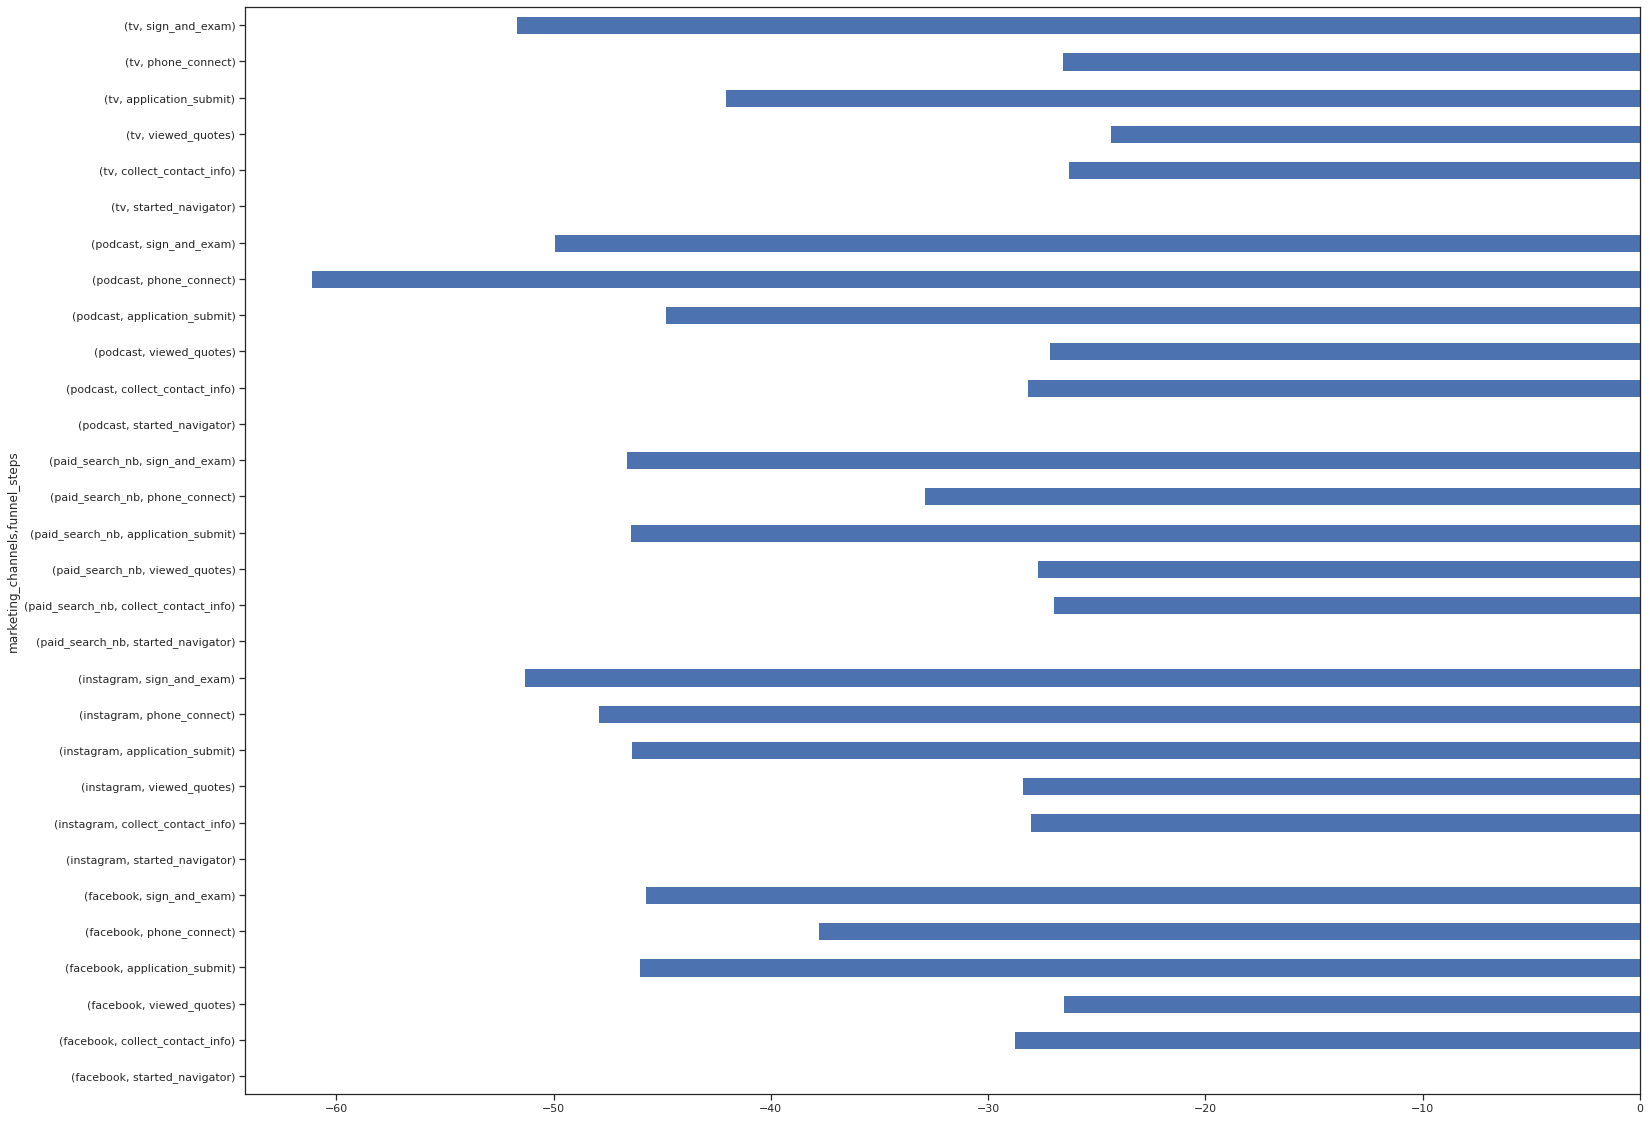

In [104]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
dropout['Percentage change'].plot(kind='barh')


#Across marketing channels we can see the rate of dropout is the most at the stage from phone_connect to sign_and_exam across all marketing channels.

#Only for podcast we can see a huge dropout from application submit to phone connect

#Huge dropout in TV been observed at the stage from phone_connect to sign_and_exam

-------------------------------------------------------------

#Here we are trying to deep dive across different features how the users are different who has been fully converted and who has not

#Getting users who are fully converted and went forward to the the next steps

In [105]:
df4.head()

,index,user_id
0,5832,6
1,9945,6
2,9922,6
3,10564,6
4,10563,6


In [106]:
df4.columns=['user_id','counts']

In [107]:
df5=df3.merge(df4, how='left')
df5.head()

,user_id,funnel_steps,age,device,income,num_conditions,premium,marketing_channels,counts
0,1001,collect_contact_info,56,desktop,157490,5,2490.123774,instagram,2
1,1001,started_navigator,56,desktop,157490,5,2490.123774,instagram,2
2,1002,application_submit,34,desktop,138171,3,1906.228442,paid_search_nb,6
3,1002,collect_contact_info,34,desktop,138171,3,1906.228442,paid_search_nb,6
4,1002,phone_connect,34,desktop,138171,3,1906.228442,paid_search_nb,6


In [108]:
df5['Conversion']=np.where(df5['counts']==6,1,0)

In [109]:
df5.head()


,user_id,funnel_steps,age,device,income,num_conditions,premium,marketing_channels,counts,Conversion
0,1001,collect_contact_info,56,desktop,157490,5,2490.123774,instagram,2,0
1,1001,started_navigator,56,desktop,157490,5,2490.123774,instagram,2,0
2,1002,application_submit,34,desktop,138171,3,1906.228442,paid_search_nb,6,1
3,1002,collect_contact_info,34,desktop,138171,3,1906.228442,paid_search_nb,6,1
4,1002,phone_connect,34,desktop,138171,3,1906.228442,paid_search_nb,6,1


In [110]:
df6=df5.drop('funnel_steps',axis=1)

In [111]:
df7=df6.drop_duplicates()

In [112]:
df7.shape
df7['Conversion'].value_counts()

0    9216
1     784
Name: Conversion, dtype: int64

In [113]:
df7.head()
sum(df7['Conversion'])

784

#first step in providing recommendations is to start with a high level analysis across different features for the users

#Analysis across age and the conversion across different age groups

In [114]:
df=df7

In [115]:
conversion_rate_by_age = df.groupby(by='age')['Conversion'].sum() / df.groupby(by='age')['Conversion'].count() * 100.0
pd.DataFrame(conversion_rate_by_age.reset_index().rename(columns={'conversion':'conversion_%'})).head()

,age,Conversion
0,18,5.102041
1,19,6.140351
2,20,9.375000
3,21,6.832298
4,22,9.359606


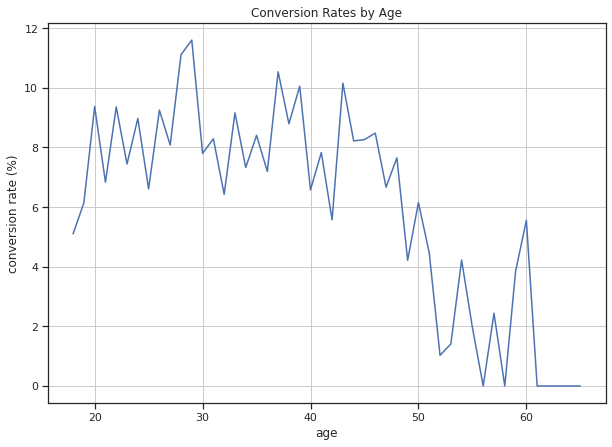

In [116]:
ax = conversion_rate_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

#We can observe a steady decrease in conversion rate as we past 45

In [117]:
#Forming groups on age

In [118]:
def age_group_function(df):

    if (df['age'] >= 70):
        return '70<'
    
    elif (df['age'] < 70) and (df['age'] >= 60):
        return '[60, 70]'
              
    elif (df['age'] <= 60) and (df['age'] >= 50):
        return '[50, 60]'

    elif (df['age'] <= 50) and (df['age'] >= 40):
        return '[40, 50]'
    
    elif (df['age'] <= 40) and (df['age'] >= 30):
        return '[30, 40]'
    
    elif (df['age'] <= 30) and (df['age'] >= 20):
        return '[20, 30]'
    
    elif (df['age'] < 20):
        return '<20'    
    
df['age_group'] = df.apply(age_group_function, axis = 1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,age,device,income,num_conditions,premium,marketing_channels,counts,Conversion,age_group
0,1001,56,desktop,157490,5,2490.123774,instagram,2,0,"[50, 60]"
2,1002,34,desktop,138171,3,1906.228442,paid_search_nb,6,1,"[30, 40]"
8,1003,32,desktop,94274,2,1515.217172,paid_search_nb,1,0,"[30, 40]"
9,1004,32,desktop,160480,4,2263.763328,tv,1,0,"[30, 40]"
10,1005,33,desktop,141943,3,1624.410806,podcast,1,0,"[30, 40]"


In [119]:
conversion_rate_by_age_group = df.groupby(by='age_group')['Conversion'].sum() / df.groupby(by='age_group')['Conversion'].count() * 100.0
pd.DataFrame(conversion_rate_by_age_group.reset_index().rename(columns={'conversion':'conversion_%'}))

,age_group,Conversion
0,<20,5.660377
1,"[20, 30]",9.102349
2,"[30, 40]",8.378512
3,"[40, 50]",7.405986
4,"[50, 60]",3.079179
5,"[60, 70]",1.724138


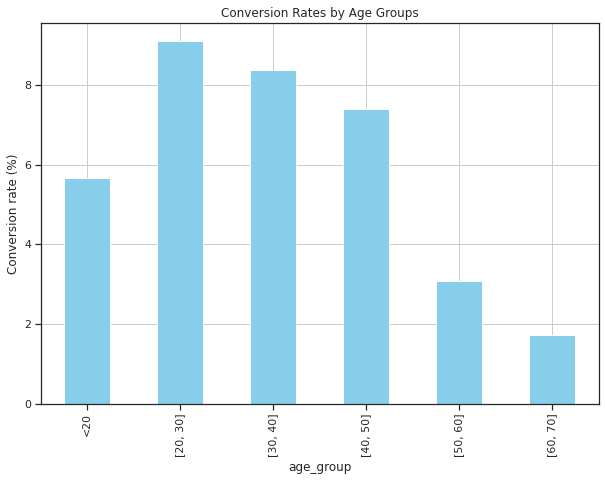

In [120]:
ax = conversion_rate_by_age_group.loc[['<20', '[20, 30]', '[30, 40]', '[40, 50]', '[50, 60]', '[60, 70]']].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups')

ax.set_xlabel('age_group')
ax.set_ylabel('Conversion rate (%)')

plt.show()

we can observe the highest conversion rate in the age groups from 20 to 40 with people of age group between age [20,30] being the highest


In [121]:
df.head()

,user_id,age,device,income,num_conditions,premium,marketing_channels,counts,Conversion,age_group
0,1001,56,desktop,157490,5,2490.123774,instagram,2,0,"[50, 60]"
2,1002,34,desktop,138171,3,1906.228442,paid_search_nb,6,1,"[30, 40]"
8,1003,32,desktop,94274,2,1515.217172,paid_search_nb,1,0,"[30, 40]"
9,1004,32,desktop,160480,4,2263.763328,tv,1,0,"[30, 40]"
10,1005,33,desktop,141943,3,1624.410806,podcast,1,0,"[30, 40]"


In [122]:
dfu = df.groupby(['marketing_channels']).Conversion.value_counts().unstack()

#Conversion across marketing channels

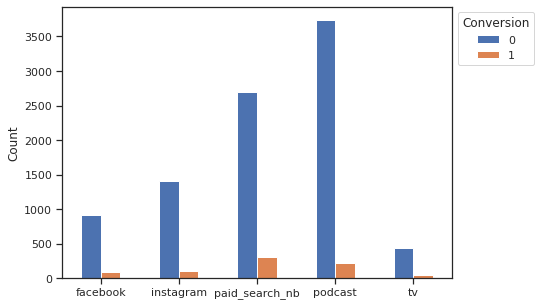

In [123]:
ax = dfu.plot(kind='bar', figsize=(7, 5), xlabel='', ylabel='Count', rot=0)
ax.legend(title='Conversion', bbox_to_anchor=(1, 1), loc='upper left')

#Converion rate is a little higher on the paid_search_nb compared to other channels

#Converion across the devices and we can see a significant difference in distribution in income for the converted and nonconverted ones across the devices

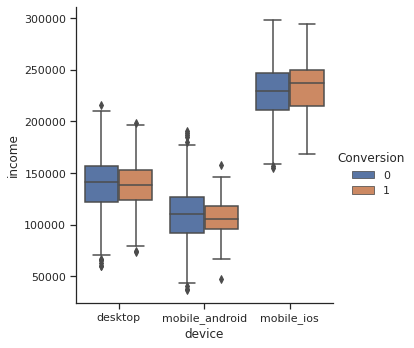

In [124]:
sns.catplot(x="device", y="income", hue="Conversion", kind="box", data=df)

#Converion across the devices and we can see a significant difference in distribution in premium value for the converted and nonconverted ones across the devices

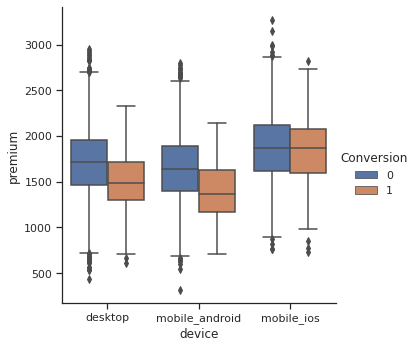

In [125]:
sns.catplot(x="device", y="premium", hue="Conversion", kind="box", data=df)

#Converion across the devices and we can see a significant difference in distribution in income for the converted and nonconverted ones across the marketing channels

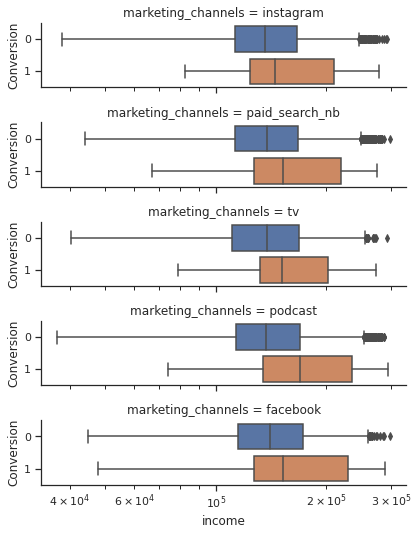

In [126]:
g = sns.catplot(x="income", y="Conversion", row="marketing_channels",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

-------------------------------------

#Here we are trying to fit a classifier model where we are considering the target variable whether a particular user has converted or not

#We are building a random forest classifier model to predict whether a particular user will convert or not based on the features

In [127]:
df.head()
#df.drop(['user_id','age_group','counts'],axis=1,inplace=True)


,user_id,age,device,income,num_conditions,premium,marketing_channels,counts,Conversion,age_group
0,1001,56,desktop,157490,5,2490.123774,instagram,2,0,"[50, 60]"
2,1002,34,desktop,138171,3,1906.228442,paid_search_nb,6,1,"[30, 40]"
8,1003,32,desktop,94274,2,1515.217172,paid_search_nb,1,0,"[30, 40]"
9,1004,32,desktop,160480,4,2263.763328,tv,1,0,"[30, 40]"
10,1005,33,desktop,141943,3,1624.410806,podcast,1,0,"[30, 40]"


In [128]:
df.dtypes

user_id                 int64
age                     int64
device                 object
income                  int64
num_conditions          int64
premium               float64
marketing_channels     object
counts                  int64
Conversion              int64
age_group              object
dtype: object

In [129]:
#Implementing the minmax scaling  for the numeric variables as the magnitudes are different

df_normalized = df

for col in df[['income','age','premium']].columns:
        df_normalized[col] = (df_normalized[col] - df_normalized[col].min()) / (df_normalized[col].max() - df_normalized[col].min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
df.head()

,user_id,age,device,income,num_conditions,premium,marketing_channels,counts,Conversion,age_group
0,1001,0.808511,desktop,0.461771,5,0.736679,instagram,2,0,"[50, 60]"
2,1002,0.340426,desktop,0.387734,3,0.538863,paid_search_nb,6,1,"[30, 40]"
8,1003,0.297872,desktop,0.219507,2,0.406394,paid_search_nb,1,0,"[30, 40]"
9,1004,0.297872,desktop,0.473229,4,0.659991,tv,1,0,"[30, 40]"
10,1005,0.319149,desktop,0.402190,3,0.443387,podcast,1,0,"[30, 40]"


In [131]:
#One hot encoding for the device and marketing channels to put into our classifier model
df= pd.get_dummies(df, columns=["device", "marketing_channels"])

In [132]:
x = df.drop(['Conversion','age_group','user_id','counts'], axis=1)
y = df['Conversion']

In [133]:
print(x.shape)
print(y.shape)

(10000, 12)
(10000,)


In [134]:
#As here like any other real life problem we are facing an issue of imbalnced dataset with conversion of only 8% all the way 
#we are using oversampling technique

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [135]:
x.head()

,age,income,num_conditions,premium,device_desktop,device_mobile_android,device_mobile_ios,marketing_channels_facebook,marketing_channels_instagram,marketing_channels_paid_search_nb,marketing_channels_podcast,marketing_channels_tv
0,0.808511,0.461771,5,0.736679,1,0,0,0,1,0,0,0
2,0.340426,0.387734,3,0.538863,1,0,0,0,0,1,0,0
8,0.297872,0.219507,2,0.406394,1,0,0,0,0,1,0,0
9,0.297872,0.473229,4,0.659991,1,0,0,0,0,0,0,1
10,0.319149,0.402190,3,0.443387,1,0,0,0,0,0,1,0


In [136]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(x,y)

In [137]:
trainX, testX, trainY, testY = train_test_split(X_res, y_res, test_size = 0.2)

In [138]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5)
rf_model.fit(trainX, trainY)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [139]:
feat_imps = pd.DataFrame({'importance': rf_model.feature_importances_}, index=trainX.columns)
feat_imps.sort_values(by='importance', ascending=False, inplace=True)
feat_imps

,importance
num_conditions,0.316621
device_mobile_android,0.163803
income,0.152239
age,0.096436
premium,0.089914
device_mobile_ios,0.083052
device_desktop,0.047346
marketing_channels_podcast,0.026730
marketing_channels_paid_search_nb,0.015733
marketing_channels_instagram,0.003222


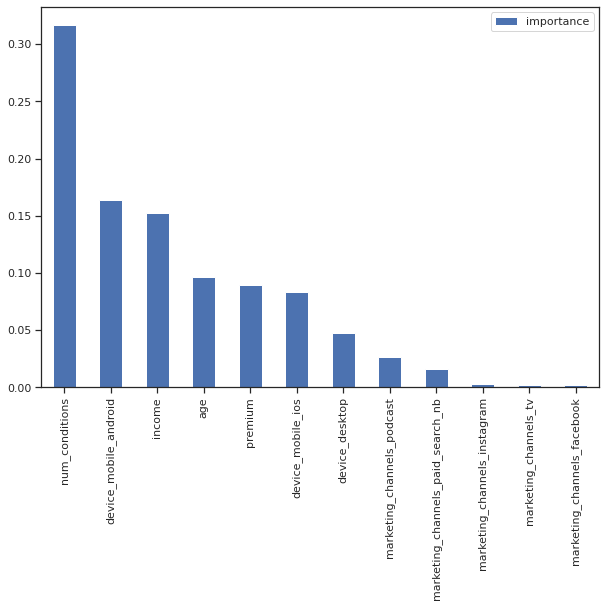

In [140]:
feat_imps.plot(kind='bar', figsize=(10,7))

plt.legend()
plt.show()

#In the above we can have a glimpse the features which are important in order and help us to determine which are the features are contributing in deciding whether an user will convert all the way or not.

#health conditions,income,premium and age are main drivers associated with people converting through the funnel

In [141]:
rf_preds_train = rf_model.predict(trainX)
rf_preds_test = rf_model.predict(testX)

print('Random Forest Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
    accuracy_score(trainY, rf_preds_train),
    accuracy_score(testY, rf_preds_test)
))

Random Forest Classifier:
> Accuracy on training data = 0.7425
> Accuracy on test data = 0.7300


#we are getting a test accuracy of 74% which can be improved based on some fine tuning hyperparameters and using grid search

#We are implementing decision tree model to check on the rules of conversion 

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_res , y_res, test_size = 0.2, random_state = 42)


In [143]:
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [144]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

In [145]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [146]:
pred=clf.predict(X_test)
pred

array([0, 1, 0, ..., 1, 0, 0])

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8730248306997742

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1546,  255],
       [ 195, 1548]])

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.89      0.86      0.87      1801
           0       0.86      0.89      0.87      1743

    accuracy                           0.87      3544
   macro avg       0.87      0.87      0.87      3544
weighted avg       0.87      0.87      0.87      3544



#Here we are getting a good recall and precision score of around 89% in test dataset

In [150]:
clf=DecisionTreeClassifier(max_depth =4)
clf=clf.fit(X_train,y_train)

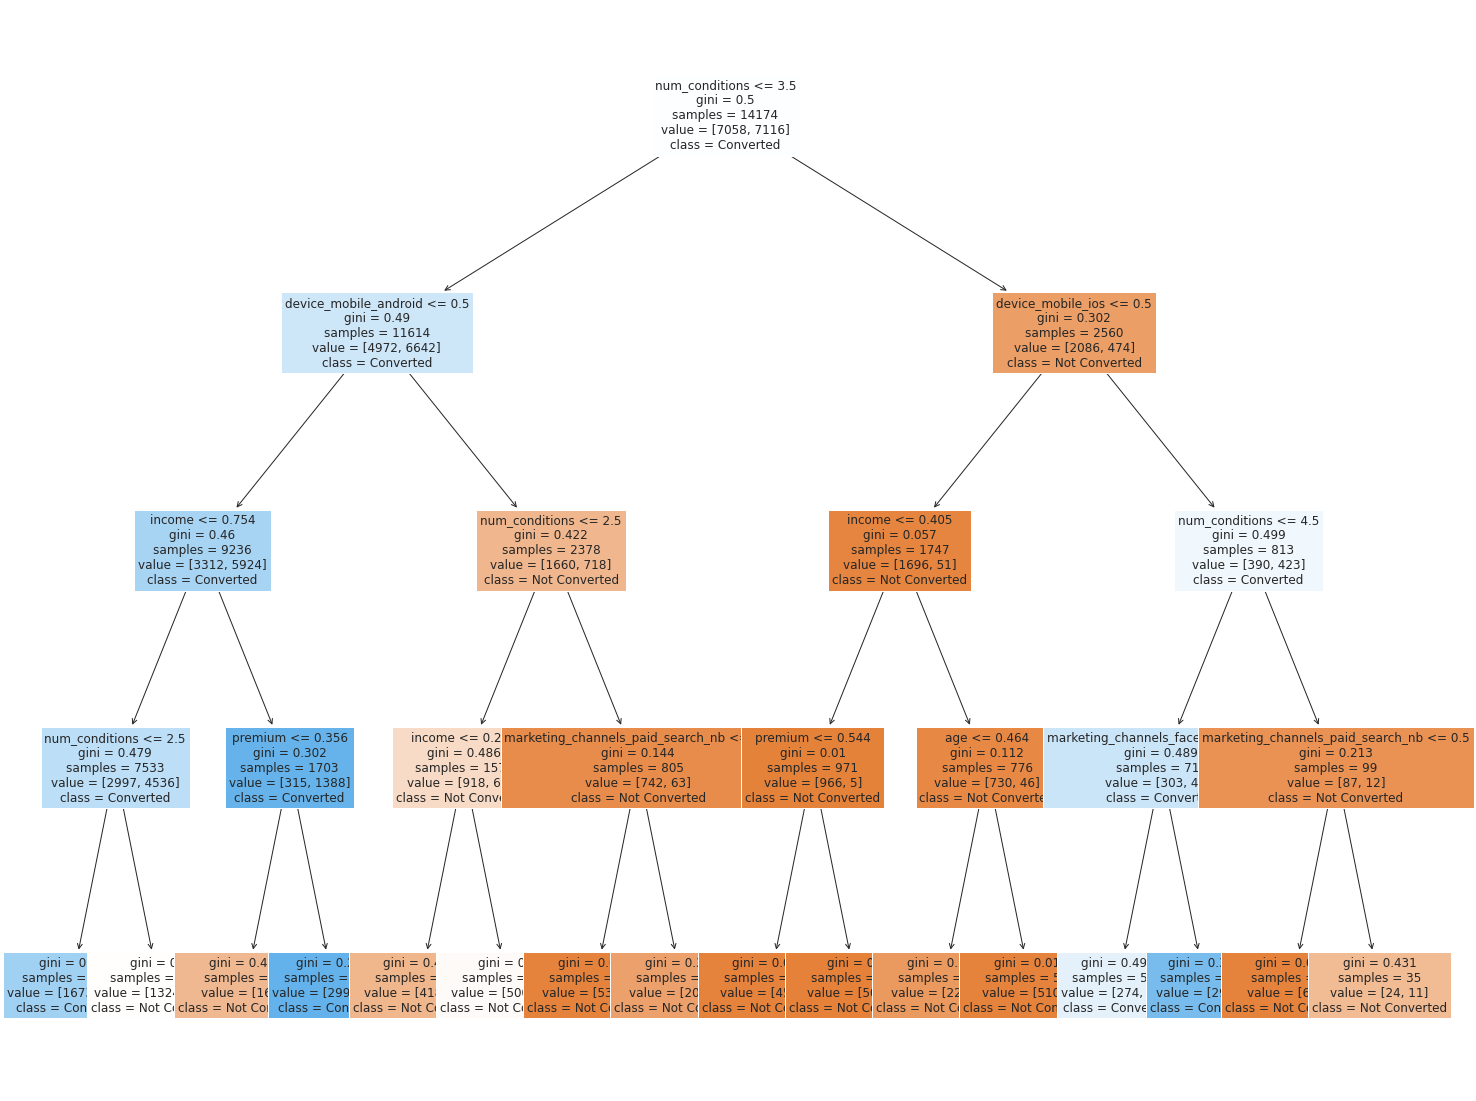

In [151]:
from sklearn import tree

fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,feature_names=x.columns,class_names={0:'Not Converted',1:'Converted'},filled=True,fontsize=12)

#Rules across the features to decide whether the user will be converted or not



-----------------------------

#Customer segmentation

#Here we trying to make some customer segmentation and find some similar behaving clusters to see if there is any particular group of people has a higher propensity of getting converted

#As we have both continuous and categorical variables we are using K-prototype to make the cluster


In [152]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [153]:
df.head()
df.shape


(10000, 16)

In [154]:
x1 = df.drop(['age_group','user_id','counts','Conversion'], axis=1)
#y = df['Conversion']
x1.values

array([[0.80851064, 0.46177076, 5.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34042553, 0.3877343 , 3.        , ..., 1.        , 0.        ,
        0.        ],
       [0.29787234, 0.21950724, 2.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.65957447, 0.85576322, 3.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04255319, 0.48534332, 4.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06382979, 0.5067123 , 3.        , ..., 0.        , 1.        ,
        0.        ]])

In [155]:
x1.head()
#x1.dtypes

,age,income,num_conditions,premium,device_desktop,device_mobile_android,device_mobile_ios,marketing_channels_facebook,marketing_channels_instagram,marketing_channels_paid_search_nb,marketing_channels_podcast,marketing_channels_tv
0,0.808511,0.461771,5,0.736679,1,0,0,0,1,0,0,0
2,0.340426,0.387734,3,0.538863,1,0,0,0,0,1,0,0
8,0.297872,0.219507,2,0.406394,1,0,0,0,0,1,0,0
9,0.297872,0.473229,4,0.659991,1,0,0,0,0,0,0,1
10,0.319149,0.402190,3,0.443387,1,0,0,0,0,0,1,0


In [156]:
Kpro=KPrototypes(n_clusters=3,verbose=2,max_iter=20)
clusters=Kpro.fit_predict(x1,categorical=[1,3,5])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2307, ncost: 25398.723725442716
Run: 1, iteration: 2/20, moves: 1015, ncost: 24906.137127090653
Run: 1, iteration: 3/20, moves: 0, ncost: 24906.137127090653
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 711, ncost: 26167.129706643784
Run: 2, iteration: 2/20, moves: 459, ncost: 25876.620416704594
Run: 2, iteration: 3/20, moves: 84, ncost: 25866.75304275542
Run: 2, iteration: 4/20, moves: 0, ncost: 25866.75304275542
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 1410, ncost: 25340.62263597315
Run: 3, iteration: 2/20, moves: 24, ncost: 25338.36408839773
Run: 3, iteration: 3/20, moves: 0, ncost: 25338.36408839773
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 1569, ncost: 25624.639548678

In [157]:
print(Kpro.cluster_centroids_)

[[0.3916972  3.         0.48969236 0.20837298 0.09609895 0.16206787
  0.29495718 0.39898509 0.0478909  0.35991937 0.16198283 0.        ]
 [0.30489148 1.62938435 0.49448124 0.19990189 0.10596026 0.15452539
  0.29948492 0.39244543 0.04758401 0.12031931 0.         0.        ]
 [0.47445272 4.25884477 0.48519856 0.2032491  0.1032491  0.1368231
  0.30722022 0.40036101 0.05234657 0.2920376  0.30079638 0.        ]]


In [158]:
cluster_list=[]

for c in clusters:
    cluster_list.append(c)

In [159]:
df['cluster']=cluster_list

In [160]:
clusterdata=df[['user_id','cluster','Conversion']]
clusterdata=clusterdata.merge(df3[['user_id', 'age', 'device', 'income', 'num_conditions','premium', 'marketing_channels']].drop_duplicates(),how='left')
clusterdata.head()
clusterdata['cluster'].value_counts()

1    4077
0    3153
2    2770
Name: cluster, dtype: int64

In [161]:
clusterdata.groupby(by='cluster')['Conversion'].value_counts()

cluster  Conversion
0        0             2928
         1              225
1        0             3583
         1              494
2        0             2705
         1               65
Name: Conversion, dtype: int64

#Clusters properties which has been segmented based on the age ,income and numeric conditions

#We have higher conversion happening for cluster 1

In [162]:
clusterdata[clusterdata['cluster']==1].describe()

,user_id,cluster,Conversion,age,income,num_conditions,premium
count,4077.000000,4077.0,4077.000000,4077.000000,4077.000000,4077.000000,4077.000000
mean,5972.776551,1.0,0.121168,32.329899,140770.021584,1.629384,1432.463297
std,2899.404088,0.0,0.326362,8.336155,48803.811381,0.590861,283.833190
min,1003.000000,1.0,0.000000,18.000000,36996.000000,0.000000,315.660679
25%,3435.000000,1.0,0.000000,26.000000,106205.000000,1.000000,1246.234267
50%,5960.000000,1.0,0.000000,31.000000,131824.000000,2.000000,1435.455491
75%,8482.000000,1.0,0.000000,38.000000,162841.000000,2.000000,1630.082732
max,10996.000000,1.0,1.000000,63.000000,285603.000000,2.000000,2314.978190


In [163]:
clusterdata[clusterdata['cluster']==0].describe()

,user_id,cluster,Conversion,age,income,num_conditions,premium
count,3153.000000,3153.0,3153.000000,3153.000000,3153.000000,3153.0,3153.000000
mean,6022.524897,0.0,0.071361,36.409768,150337.020615,3.0,1758.676766
std,2876.599867,0.0,0.257467,8.211060,49463.125005,0.0,247.957494
min,1002.000000,0.0,0.000000,18.000000,38131.000000,3.0,793.787261
25%,3529.000000,0.0,0.000000,31.000000,116248.000000,3.0,1586.684660
50%,6005.000000,0.0,0.000000,36.000000,140729.000000,3.0,1754.254626
75%,8550.000000,0.0,0.000000,42.000000,170406.000000,3.0,1931.474076
max,11000.000000,0.0,1.000000,65.000000,293521.000000,3.0,2628.156240


In [164]:
clusterdata[clusterdata['cluster']==2].describe()

,user_id,cluster,Conversion,age,income,num_conditions,premium
count,2770.000000,2770.0,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
mean,6016.234296,2.0,0.023466,40.299278,156842.590253,4.258845,2067.577173
std,2880.843945,0.0,0.151405,8.853343,49424.423053,0.516051,282.856413
min,1001.000000,2.0,0.000000,18.000000,44851.000000,4.000000,1183.712091
25%,3573.750000,2.0,0.000000,34.000000,120427.500000,4.000000,1868.149434
50%,6033.500000,2.0,0.000000,39.000000,147541.500000,4.000000,2055.663108
75%,8476.750000,2.0,0.000000,47.000000,180469.750000,4.000000,2255.980719
max,10999.000000,2.0,1.000000,65.000000,297935.000000,7.000000,3267.372222


In [165]:
#we are getting optimised 3 clusters 

In [166]:
clusterdata.groupby(by='cluster')['num_conditions'].value_counts()

cluster  num_conditions
0        3                 3153
1        2                 2802
         1                 1039
         0                  236
2        4                 2149
         5                  532
         6                   82
         7                    7
Name: num_conditions, dtype: int64

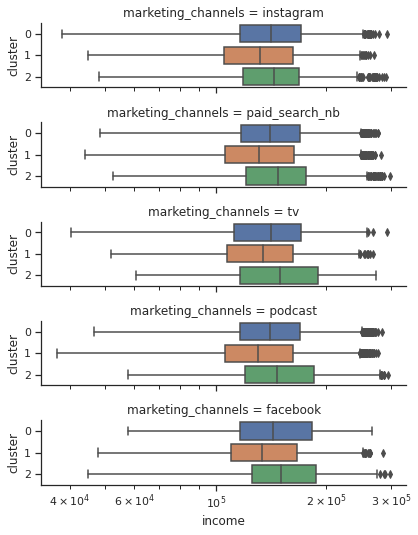

In [167]:
g = sns.catplot(x="income", y="cluster", row="marketing_channels",
                kind="box", orient="h", height=1.5, aspect=4,
                data=clusterdata)
g.set(xscale="log")

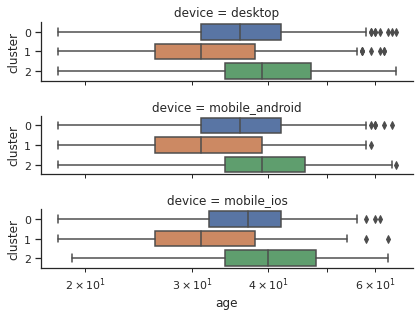

In [168]:
g = sns.catplot(x="age", y="cluster", row="device",
                kind="box", orient="h", height=1.5, aspect=4,
                data=clusterdata)
g.set(xscale="log")

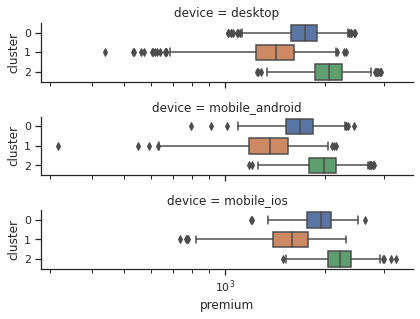

In [169]:
g = sns.catplot(x="premium", y="cluster", row="device",
                kind="box", orient="h", height=1.5, aspect=4,
                data=clusterdata)
g.set(xscale="log")

#By seeing the distribution of the higher conversion rates we can focus on the feature properties of the cluster 1

#Recommendations would you make to the product team?

1.How can we market our products so that we can have more conversion rate from phone connect to sogn and exam where we have a big dropout there.

2.As we see a steady decrease in conversion rate as we past 45 we should focus more on the age group of [20-40]

3.People using mobile ios has been observed with higher income and higher premiums ,we can plan to make recommendation to the users using IOS devices accordingly.

4.Across all marketing channels users who has converted has income distribution on the higher side.

5.We should focus on demographic details of the health conditions ,income ,android users and age while approaching them with insurance as they are the main drivers for conversion.

6.Based on the tree rules we can take some decisive actions as well to increase conversion rates.

7.Based on the segmentation we can clearly see the cluster 1 driving the most conversions.

Properties of cluster1:
Premium and Age on lower side, 
health conditions on the lower side
and income mostly around the average.



--------------------------------

#Caveats of the analysis:

#If we had more data and more users who has been converted to the final stage we could have fetched more insights from the users 


#Apart from the present attributes we can also focus on the user's job profile,marital status,education,any existing default loans,any existing housing loans,time duration at any funnel stage,marketing campaigns.

#Reminder to users at each funnel stage will also help.



--------------------------------------------------

#We can expand this work

#Here we have focused all the way to the full conversion that is the last stage.We can also focus on the intermediate steps at each funnel flow by creating indicator variables and focusing on the bounce rates.

#We can deep dive on the step where the bounce rate is very high.



----Thank you----